In [1]:
# importação das bibliotecas
from pandas_datareader import data as wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ações do Desafio

TickerA='LAME4.SA'
TickerB='WEGE3.SA'
TickerC='BRFS3.SA'
TickerD='^BVSP'    # mercado
prices = pd.DataFrame()
tickers = [TickerA, TickerB, TickerC, TickerD]

# Importando as cotações diárias do Yahoo Finance
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2012-1-1')['Adj Close']
    

lame = prices.drop(columns = ['WEGE3.SA','BRFS3.SA', '^BVSP']).rename(columns={'LAME4.SA': 'Preço'})
weg = prices.drop(columns = ['LAME4.SA','BRFS3.SA', '^BVSP']).rename(columns={'WEGE3.SA': 'Preço'})
brf = prices.drop(columns = ['WEGE3.SA','LAME4.SA', '^BVSP']).rename(columns={'BRFS3.SA': 'Preço'})
ibov = prices.drop(columns = ['WEGE3.SA','LAME4.SA', 'BRFS3.SA']).rename(columns={'^BVSP': 'Preço'})

prices2 = prices #contem o IBOV
prices = prices.sort_values(by = ['Date'],ascending=True).drop(columns = '^BVSP')
prices.head()

,LAME4.SA,WEGE3.SA,BRFS3.SA
Date,,,
2012-01-02,7.184129,4.082735,33.019550
2012-01-03,7.213193,4.179007,33.418934
2012-01-04,7.198660,4.200883,33.688293
2012-01-05,7.203507,4.227145,33.883343
2012-01-06,7.193813,4.179007,33.985516


In [3]:
# Atribua pesos aos 3 ativos.

pesos = np.array([0.5, 0.3, 0.2])
print('Pesos:', pesos)

Pesos: [0.5 0.3 0.2]


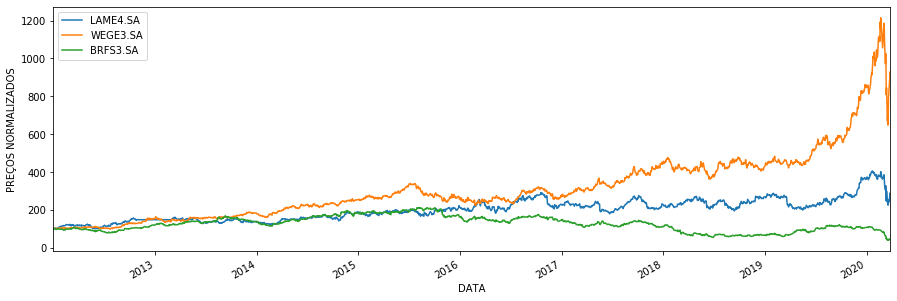

In [4]:
# Gráfico com preços normalizados
price_norm = (prices/prices.iloc[0]*100)
price_norm.plot(figsize=(15,5))
plt.ylabel('PREÇOS NORMALIZADOS')
plt.xlabel('DATA')
plt.show()

# Retornos e Evolução da Carteira

In [5]:
# Retornos diários

d_returns = prices.pct_change()
d_returns2 = prices2.pct_change()
returns_annual = d_returns.mean() * 250

ret_ibov = ibov['Preço'].pct_change()
ret_data = prices.pct_change()
ret_port = (ret_data * pesos).sum(axis = 1)
ret_data.head()

,LAME4.SA,WEGE3.SA,BRFS3.SA
Date,,,
2012-01-02,NaN,NaN,NaN
2012-01-03,0.004046,0.023580,0.012095
2012-01-04,-0.002015,0.005235,0.008060
2012-01-05,0.000673,0.006251,0.005790
2012-01-06,-0.001346,-0.011388,0.003015


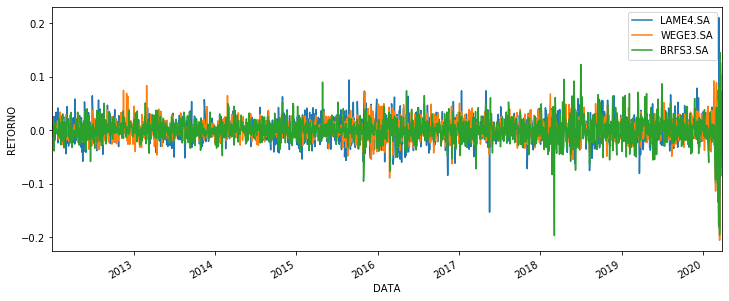

In [6]:
# Retornos diários

ret_data.plot(figsize=(12,5))
plt.xlabel('DATA')
plt.ylabel('RETORNO')
plt.show()

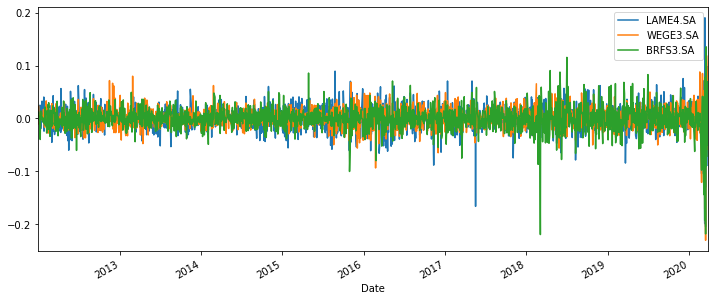

In [7]:
# Retornos Logarítmicos

log_returns = np.log(prices/prices.shift(1))
log_returns.plot(figsize=(12,5))
plt.show()

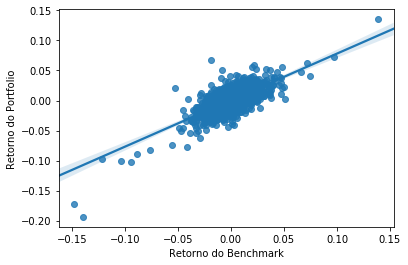

In [8]:
sns.regplot(ret_ibov.values, ret_port.values)
plt.xlabel("Retorno do Benchmark")
plt.ylabel("Retorno do Portfolio")
plt.show()

In [9]:
# Evolução da Carteira

for stock_df in (lame, weg, brf):
    stock_df['Norm return'] = stock_df['Preço'] / stock_df.iloc[0]['Preço']
for stock_df, allocation in zip((lame, weg, brf),[.5,.3,.2]):
    stock_df['Allocation'] = stock_df['Norm return'] * allocation
for stock_df in (lame, weg, brf): 
    stock_df['Position'] = stock_df['Allocation']*10000

all_pos = [lame['Position'], weg['Position'], brf['Position']]

# Evolução do portfolio

portf_val = pd.concat(all_pos, axis=1)
portf_val.columns = ['LAME Pos','WEG Pos','BRF Pos']
portf_val['Total Pos'] = portf_val.sum(axis=1)
portf_val.head()

,LAME Pos,WEG Pos,BRF Pos,Total Pos
Date,,,,
2012-01-02,5000.000000,3000.000000,2000.000000,10000.000000
2012-01-03,5020.228047,3070.740808,2024.190732,10115.159586
2012-01-04,5010.113691,3086.815572,2040.505890,10137.435154
2012-01-05,5013.487134,3106.112438,2052.320060,10171.919632
2012-01-06,5006.740249,3070.740808,2058.508687,10135.989743


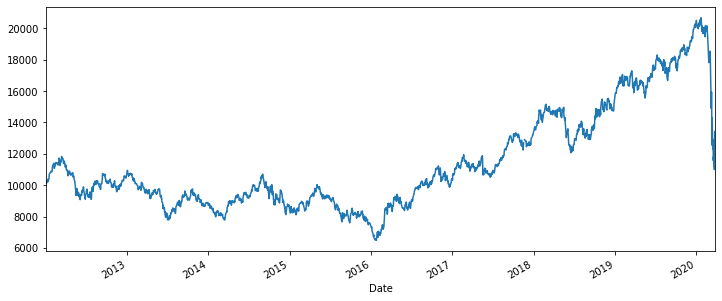

In [10]:
# Rentabilidade do Bench

ibov_norm = (ibov/ibov.iloc[0]*10000)
ibov_norm['Preço'].plot(figsize=(12,5))

In [11]:
cumulative_return = 100 * ( ibov_norm['Preço'] [-1 ] / ibov_norm['Preço'][0]-1)
print('O seu retorno cumulativo foi {:.2f}% '.format(cumulative_return))

O seu retorno cumulativo foi 26.98% 


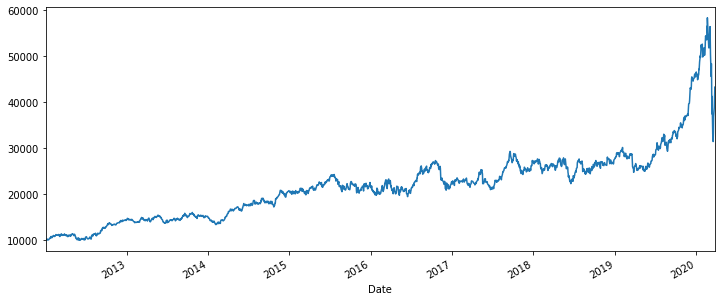

In [12]:
# Rentabilidade do portfolio
portf_val['Total Pos'].plot(figsize=(12,5))

In [13]:
cumulative_return = 100 * ( portf_val [ 'Total Pos' ] [-1 ] / portf_val ['Total Pos'][0]-1)
print('O seu retorno cumulativo foi {:.2f}% '.format(cumulative_return))

O seu retorno cumulativo foi 304.78% 


In [14]:
# Posição hoje
portf_val.tail(1)

,LAME Pos,WEG Pos,BRF Pos,Total Pos
Date,,,,
2020-03-27,13279.27196,26298.547695,900.678522,40478.498177


# Índice Sharpe

In [15]:
portf_val['Daily Return'] = portf_val['Total Pos'].pct_change(1)
Sharpe_Ratio = portf_val['Daily Return'].mean()/portf_val['Daily Return'].std()
print('Índice Sharpe (D): ' + str(Sharpe_Ratio))

Índice Sharpe (D): 0.04929774685401003


In [16]:
A_Sharpe_Ratio = (250**0.5)*Sharpe_Ratio
print('Índice Sharpe Anualizado: ' + str(A_Sharpe_Ratio))

Índice Sharpe Anualizado: 0.7794658178653596


# Variância, Covariância, Desvio Padrão e Correlação

In [17]:
# Construa uma matriz de covariância para os retornos diários do portfólio com o método .cov ()

cov_matrix_d = ret_data.cov()

# Anualize a matriz de covariância diária com os 250 dias de negociação padrão

cov_matrix_a = cov_matrix_d * 250
cov_matrix_a

,LAME4.SA,WEGE3.SA,BRFS3.SA
LAME4.SA,0.129260,0.043659,0.048673
WEGE3.SA,0.043659,0.091649,0.034267
BRFS3.SA,0.048673,0.034267,0.119599


In [18]:
# Variância do mercado
var_m = ret_ibov.var()*250       
print('Variancia do mercado (IBOV): ' + str(round(var_m*100, 4)) + '%')

Variancia do mercado (IBOV): 6.4979%


In [19]:
# Calcular a variância com a fórmula

port_variance = np.dot(pesos.T, np.dot(cov_matrix_a, pesos))

print('Variancia: ' + str(round(port_variance, 4) * 100) + '%')

Variancia: 7.23%


In [20]:
# O desvio padrão de um portfólio é apenas a raiz quadrada de sua variação

print('Desvio Padrão (Risco): '+ str(round(np.sqrt(port_variance)*100,2)) + '%')

Desvio Padrão (Risco): 26.89%


In [21]:
# Matriz de correlação dos retornos diários

ret_data.corr()

,LAME4.SA,WEGE3.SA,BRFS3.SA
LAME4.SA,1.000000,0.401118,0.391467
WEGE3.SA,0.401118,1.000000,0.327299
BRFS3.SA,0.391467,0.327299,1.000000


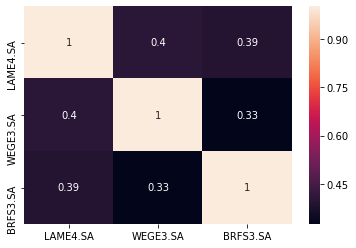

In [22]:
sns.heatmap(ret_data.corr(), annot=True)

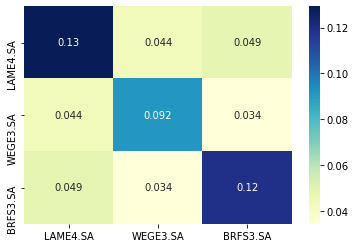

In [23]:
sns.heatmap(cov_matrix_a, annot=True, cmap="YlGnBu")

# Markowitz

In [24]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

tickers = [TickerA, TickerB, TickerC]

#set random seed for reproduction's sake
np.random.seed(101)
num_portfolios = 50000
num_assets = len(tickers)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)


# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Retornos': port_returns,
             'Volatilidade': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(tickers):
    portfolio['Peso '+symbol] = [Weight[counter] for Weight in stock_weights]


# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df.head()

,Retornos,Volatilidade,Sharpe Ratio,Peso LAME4.SA,Peso WEGE3.SA,Peso BRFS3.SA
0,0.244547,0.272917,0.896048,0.462913,0.511562,0.025525
1,0.127163,0.260086,0.488926,0.101450,0.405323,0.493227
2,0.160929,0.253454,0.634945,0.159702,0.464909,0.375389
3,0.178147,0.252658,0.705092,0.173255,0.505544,0.321201
4,0.125915,0.260667,0.483049,0.094100,0.406421,0.499480


In [25]:
len(df)

50000

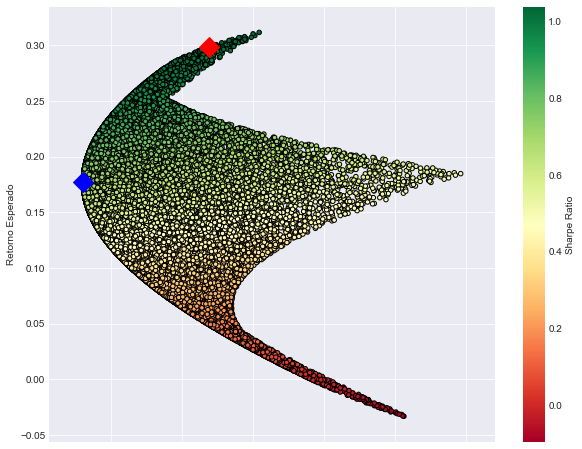

In [26]:
# find min Volatility & max sharpe values in the dataframe (df)

min_volatility = df['Volatilidade'].min()

max_sharpe = df['Sharpe Ratio'].max()


# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatilidade'] == min_volatility]


# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retornos', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)

plt.scatter(x=sharpe_portfolio['Volatilidade'], y=sharpe_portfolio['Retornos'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatilidade'], y=min_variance_port['Retornos'], c='blue', marker='D', s=200 )
plt.xlabel('Volatilidade (Desv. Padrão)')
plt.ylabel('Retorno Esperado')
#plt.title('Fronteira Eficiente')
plt.show()

In [27]:
# print the details of the 2 special portfolios

print(min_variance_port.T)
print('\n')
print(sharpe_portfolio.T)

                   3542
Retornos       0.177357
Volatilidade   0.252276
Sharpe Ratio   0.703028
Peso LAME4.SA  0.215889
Peso WEGE3.SA  0.476223
Peso BRFS3.SA  0.307888


                  44063
Retornos       0.298454
Volatilidade   0.287571
Sharpe Ratio   1.037845
Peso LAME4.SA  0.109488
Peso WEGE3.SA  0.890070
Peso BRFS3.SA  0.000443


In [28]:
print("O retorno máximo esperado é de: ",str(round(sharpe_portfolio['Retornos']*100,3))+"%") # Maior retorno

O retorno máximo esperado é de:  44063    29.845
Name: Retornos, dtype: float64%


In [29]:
print("Os valores ótimos % de cada ativo são:\n", 
      "\nLAME4:", str(round(sharpe_portfolio['Peso LAME4.SA']*100, 3))+"%",
      "\nWEGE3:", str(round(sharpe_portfolio['Peso WEGE3.SA']*100, 3))+"%",
      "\nBRFS3:", str(round(sharpe_portfolio['Peso BRFS3.SA']*100, 3))+"%")

Os valores ótimos % de cada ativo são:
 
LAME4: 44063    10.949
Name: Peso LAME4.SA, dtype: float64% 
WEGE3: 44063    89.007
Name: Peso WEGE3.SA, dtype: float64% 
BRFS3: 44063    0.044
Name: Peso BRFS3.SA, dtype: float64%
